In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"D:\STUDY\AI\PROJECT\Data-anxiety-disorder.xlsx")
data.head()

,Age,Sex,student,activities levels,family history of anxiety disorders,Total score,Classification
0,0,0,1,3,1,11,2
1,1,0,1,3,0,5,1
2,1,0,1,2,0,4,0
3,1,0,1,2,0,4,0
4,1,0,1,2,0,3,0


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df0 = data[data['Classification']==0]
df1 = data[data['Classification']==1]
df2 = data[data['Classification']==2]
df3 = data[data['Classification']==3]
a = data['Classification'].value_counts()[0]
b = data['Classification'].value_counts()[1]
c = data['Classification'].value_counts()[2]
d = data['Classification'].value_counts()[3]

print(a, b, c, d)

63 99 63 75


## Data visuallize

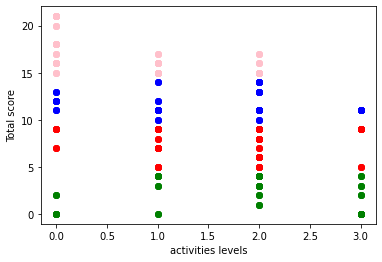

In [9]:
plt.xlabel('activities levels')
plt.ylabel('Total score')
plt.scatter(df0['activities levels'],df0['Total score'],color ='green')
plt.scatter(df1['activities levels'],df1['Total score'],color ='red')
plt.scatter(df2['activities levels'],df2['Total score'],color ='blue')
plt.scatter(df3['activities levels'],df3['Total score'],color ='pink')

## Scale "Score" features

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data[["Total score"]])
for i in range(len(x_scaled)):
    data["Total score"][i] = x_scaled[i]


In [10]:
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
x = data.drop(["Classification"],axis =1)
y = data["Classification"]

In [12]:
x_train, x_test , y_train,y_test = train_test_split(x,y,shuffle=False, stratify=None,test_size = 0.1)

In [121]:
svm_classifier = svm.SVC(kernel ='rbf')
svm_classifier.fit(x_train, y_train)
predictions = svm_classifier.predict(x_test)

In [122]:
svm_classifier.score(x_test,y_test)

0.7333333333333333

In [13]:
decision_tree_classifier = tree.DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)
predictions2 = decision_tree_classifier.predict(x_test)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
predictions3 = knn_classifier.predict(x_test)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train, y_train)
predictions4 = random_forest_classifier.predict(x_test)


In [26]:
decision_tree_classifier.predict([[3,2,0,3,1,1]])

C:\Users\buitr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [124]:
decision_tree_classifier.score(x_test,y_test)

1.0

In [125]:
knn_classifier.score(x_test,y_test)

0.8666666666666667

In [126]:
random_forest_classifier.score(x_test,y_test)

1.0